# **Finance Pairs Formation**

# **Import libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})

In [2]:
import sys
# locate the folder which stores the custom package using relative path
sys.path.append('../../../../../src')

import config_snippets as config_snp
import splitting_data as splitting_data
import gatev_distance_method as gatev_dist
import data_transformation_snippets as data_transform_snp
import time_series_analysis_snippets as tsa_snp
import engle_granger_cointegration_method as eg_coint
import johansen_cointegration_method as jj_coint 
import handling_dataframe as hdf
import handling_datetime as hdt

In [3]:
# Path to your config YAML file
config_file_path = "..//..//../config.yaml"

# Load the configuration
config = config_snp.load_config(config_file_path)

if config is not None:
    import ast
    # Access and use the parameters
    split_ratio = config.get("split_ratio")
    
    # Access and convert string to tuple
    # train_period = ast.literal_eval(config.get("train_period"))
    # test_period = ast.literal_eval(config.get("test_period"))
    
    # Get list of df_finance data paths
    lst_df_finance_paths = ast.literal_eval(config.get("paths_df_finance_processed"))
    

In [4]:
# Import data 
path = lst_df_finance_paths[1]
df = pd.read_csv(path)

In [5]:
# Set date as index
df.set_index("date", inplace=True)

In [6]:
df = df.dropna()

# **Split data**

In [7]:
# Example: split ratio = 0.7
df_train, df_test = splitting_data.splitting_data_by_ratio(
    df,
    split_ratio=split_ratio
)

In [8]:
# Example of splitting by specified period

# test_train, test_test = splitting_data_by_date(
#     df,
#     train_period = train_period,
#     test_period = test_period
# )

# **Gatev Distance Approach**

In [9]:
df_train

,adClose_DXG,adClose_HAG,adClose_HQC,adClose_ITA,adClose_MBB,adClose_SHB,adClose_SSI,adClose_STB,adClose_VND,adClose_VPB
date,,,,,,,,,,
2020-04-13,7.869,3.13,1.08,1.91,7.170,9.645,7.222,9.04,2.681,7.389
2020-04-14,7.782,3.07,1.05,1.91,7.239,9.645,7.250,9.16,2.657,7.889
2020-04-15,8.174,3.11,1.09,1.93,7.444,9.753,7.332,9.70,2.681,8.055
2020-04-16,8.043,3.17,1.10,2.06,7.512,9.699,7.332,9.72,2.764,8.055
2020-04-17,8.600,3.17,1.10,2.20,7.740,9.753,7.471,9.73,2.894,7.945
...,...,...,...,...,...,...,...,...,...,...
2021-05-20,20.304,5.18,3.52,6.86,18.062,17.284,22.493,29.40,11.080,24.741
2021-05-21,21.173,5.24,3.60,7.15,18.140,17.344,22.785,28.85,11.030,25.111
2021-05-22,21.173,5.24,3.60,7.15,18.140,17.344,22.785,28.85,11.030,25.111


## **Gatev Data Normalization**

In [10]:
df_cum_daily_returns_train = gatev_dist.gatev_data_normalize(df_train)

In [11]:
df_cum_daily_returns_train

,adClose_DXG,adClose_HAG,adClose_HQC,adClose_ITA,adClose_MBB,adClose_SHB,adClose_SSI,adClose_STB,adClose_VND,adClose_VPB
date,,,,,,,,,,
2020-04-14,-1.105604,-1.916933,-2.777778,0.000000,0.962343,0.000000,0.387704,1.327434,-0.895188,6.766816
2020-04-15,3.875969,-0.638978,0.925926,1.047120,3.821478,1.119751,1.523124,7.300885,0.000000,9.013398
2020-04-16,2.211209,1.277955,1.851852,7.853403,4.769874,0.559876,1.523124,7.522124,3.095860,9.013398
2020-04-17,9.289617,1.277955,1.851852,15.183246,7.949791,1.119751,3.447798,7.632743,7.944797,7.524699
2020-04-18,9.289617,1.277955,1.851852,15.183246,7.949791,1.119751,3.447798,7.632743,7.944797,7.524699
...,...,...,...,...,...,...,...,...,...,...
2021-05-20,158.025162,65.495208,225.925926,259.162304,151.910739,79.201659,211.451122,225.221239,313.278627,234.835566
2021-05-21,169.068497,67.412141,233.333333,274.345550,152.998605,79.823743,215.494323,219.137168,311.413652,239.843010
2021-05-22,169.068497,67.412141,233.333333,274.345550,152.998605,79.823743,215.494323,219.137168,311.413652,239.843010


## **Gatev Distance Approach Pairs Formation**

In [12]:
gatev_dist.gatev_distance_matrix(df_cum_daily_returns_train)

In [13]:
gatev_pairs, list_result_smallest_dist = gatev_dist.gatev_distance_smallest(
    df=df_cum_daily_returns_train,
    top_values=10
)

In [14]:
for res in list_result_smallest_dist:
    print(res)
    
print(gatev_pairs)

Khoảng cách Euclide của adClose_DXG và adClose_MBB: 609.4
Khoảng cách Euclide của adClose_DXG và adClose_SSI: 570.4
Khoảng cách Euclide của adClose_DXG và adClose_STB: 530.1
Khoảng cách Euclide của adClose_DXG và adClose_VPB: 602.8
Khoảng cách Euclide của adClose_HAG và adClose_MBB: 701.1
Khoảng cách Euclide của adClose_MBB và adClose_STB: 420.3
Khoảng cách Euclide của adClose_MBB và adClose_VPB: 470.0
Khoảng cách Euclide của adClose_SSI và adClose_STB: 626.8
Khoảng cách Euclide của adClose_SSI và adClose_VND: 579.0
Khoảng cách Euclide của adClose_STB và adClose_VPB: 436.8
[['adClose_DXG', 'adClose_MBB'], ['adClose_DXG', 'adClose_SSI'], ['adClose_DXG', 'adClose_STB'], ['adClose_DXG', 'adClose_VPB'], ['adClose_HAG', 'adClose_MBB'], ['adClose_MBB', 'adClose_STB'], ['adClose_MBB', 'adClose_VPB'], ['adClose_SSI', 'adClose_STB'], ['adClose_SSI', 'adClose_VND'], ['adClose_STB', 'adClose_VPB']]


In [15]:
gatev_pairs

[['adClose_DXG', 'adClose_MBB'],
 ['adClose_DXG', 'adClose_SSI'],
 ['adClose_DXG', 'adClose_STB'],
 ['adClose_DXG', 'adClose_VPB'],
 ['adClose_HAG', 'adClose_MBB'],
 ['adClose_MBB', 'adClose_STB'],
 ['adClose_MBB', 'adClose_VPB'],
 ['adClose_SSI', 'adClose_STB'],
 ['adClose_SSI', 'adClose_VND'],
 ['adClose_STB', 'adClose_VPB']]

# **Cointegration Approach**

## **Data Transformation**

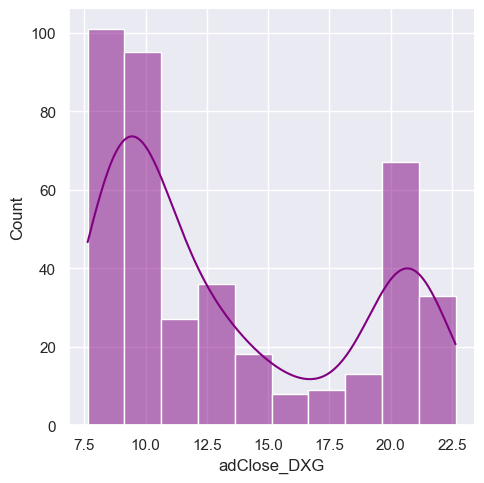

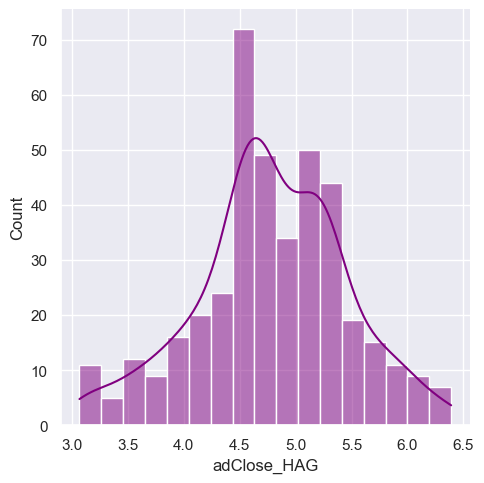

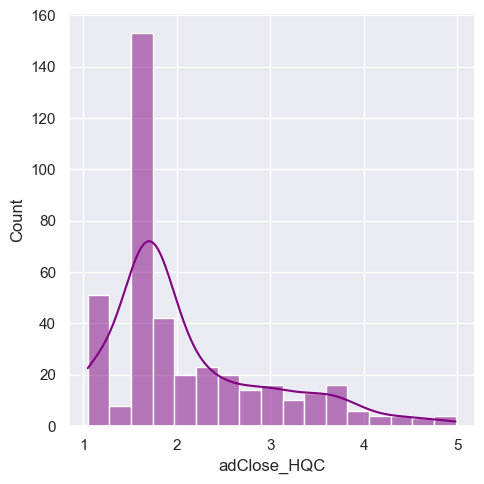

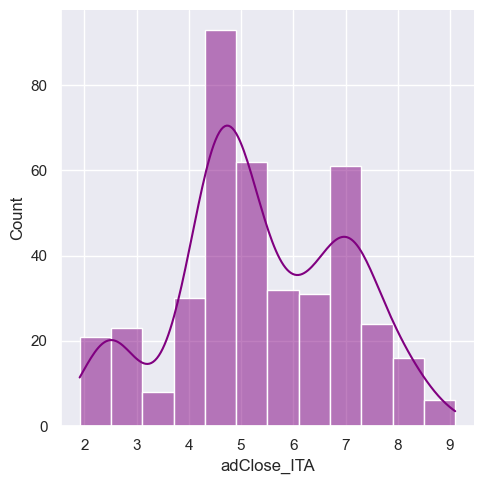

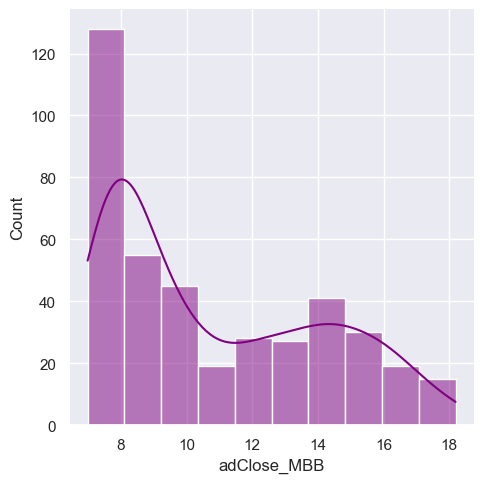

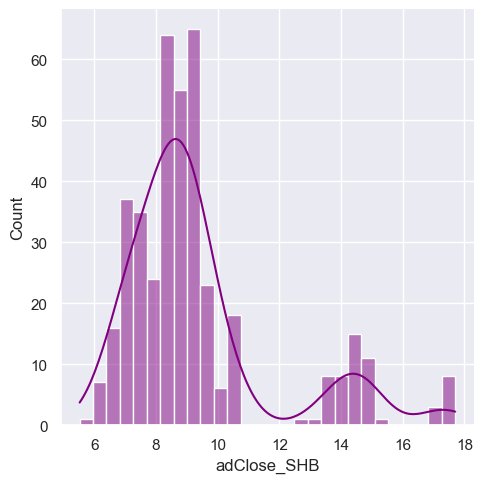

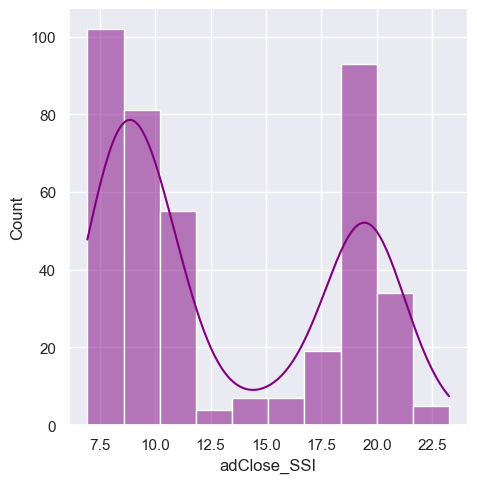

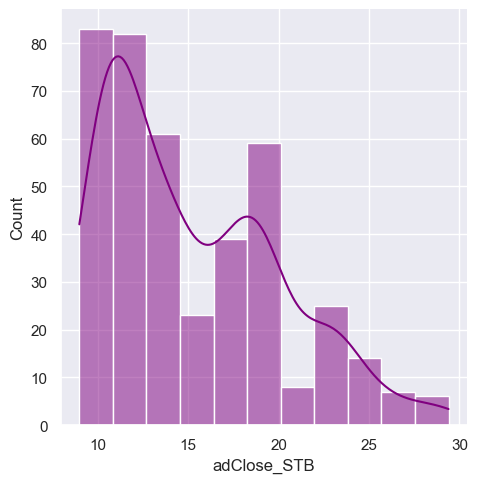

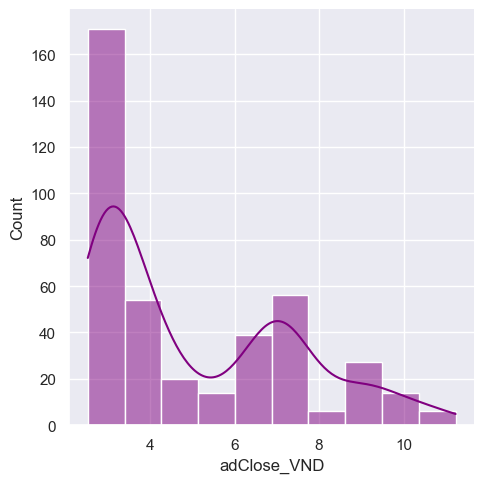

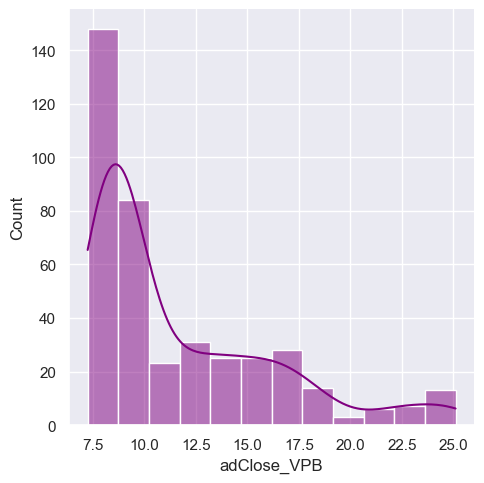

In [16]:
# Visualize distribution of values of each stock
data_transform_snp.dist_stock_visualization(df_train)

In [17]:
# Take natural log transformation of the data  
df_train_transformed = data_transform_snp.df_natural_log_transformed(df_train)

In [18]:
# Visualize distribution of transformed values of each stock
data_transform_snp.dist_stock_visualization(df_train_transformed)

## **Pretesting Stationary**

In [19]:
tsa_snp.find_integration_order(df_train_transformed)

,Column Name,Integration Order
0,adClose_DXG,1
1,adClose_HAG,0
2,adClose_HQC,1
3,adClose_ITA,1
4,adClose_MBB,1
5,adClose_SHB,1
6,adClose_SSI,1
7,adClose_STB,1
8,adClose_VND,1
9,adClose_VPB,1


In [20]:
# Only use time series that have order of integration is 1 
df_order_of_integration_ts = tsa_snp.find_integration_order(df_train_transformed)
lst_non_stationary_ts = df_order_of_integration_ts[
    df_order_of_integration_ts['Integration Order'] == 1
]['Column Name'].tolist()

# Keep those stocks which have order of integration is 1 
df_train_transformed = df_train_transformed[lst_non_stationary_ts]

# Print df
df_train_transformed

,adClose_DXG,adClose_HQC,adClose_ITA,adClose_MBB,adClose_SHB,adClose_SSI,adClose_STB,adClose_VND,adClose_VPB
date,,,,,,,,,
2020-04-13,2.062931,0.076961,0.647103,1.969906,2.266440,1.977132,2.201659,0.986190,1.999992
2020-04-14,2.051813,0.048790,0.647103,1.979483,2.266440,1.981001,2.214846,0.977198,2.065469
2020-04-15,2.100958,0.086178,0.657520,2.007408,2.277575,1.992248,2.272126,0.986190,2.086293
2020-04-16,2.084802,0.095310,0.722706,2.016502,2.272023,1.992248,2.274186,1.016679,2.086293
2020-04-17,2.151762,0.095310,0.788457,2.046402,2.277575,2.011029,2.275214,1.062640,2.072543
...,...,...,...,...,...,...,...,...,...
2021-05-20,3.010818,1.258461,1.925707,2.893810,2.849781,3.113204,3.380995,2.405142,3.208462
2021-05-21,3.052727,1.280934,1.967112,2.898119,2.853247,3.126102,3.362110,2.400619,3.223306
2021-05-22,3.052727,1.280934,1.967112,2.898119,2.853247,3.126102,3.362110,2.400619,3.223306


## **Engle - Grange Method**

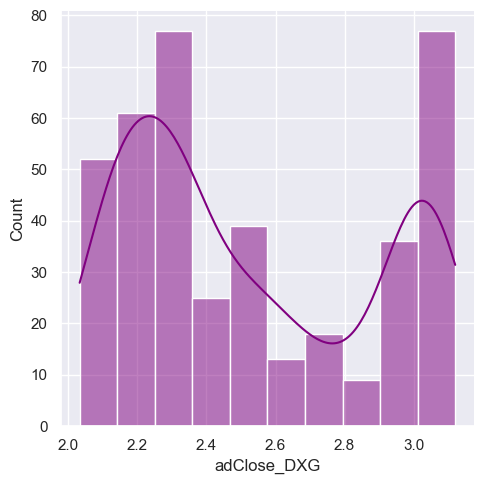

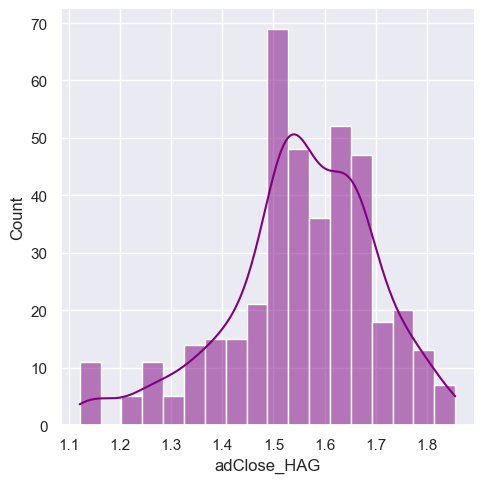

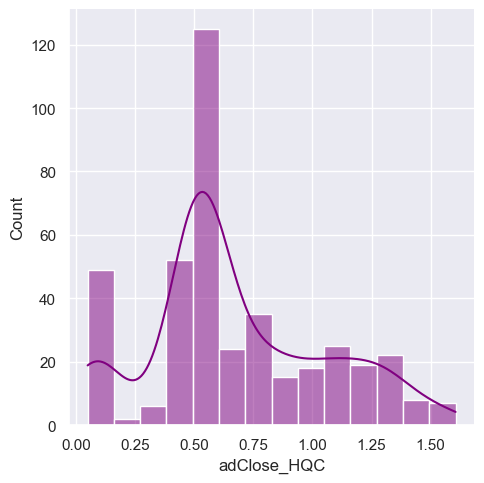

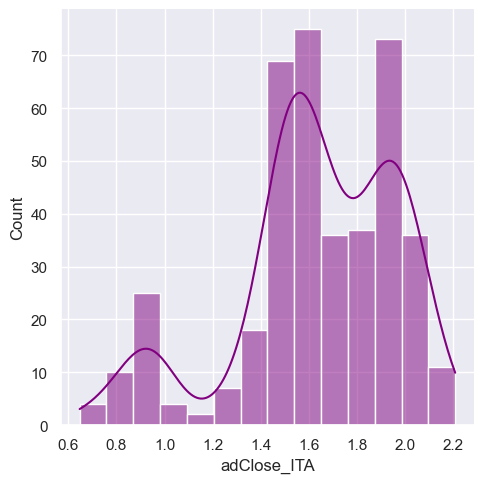

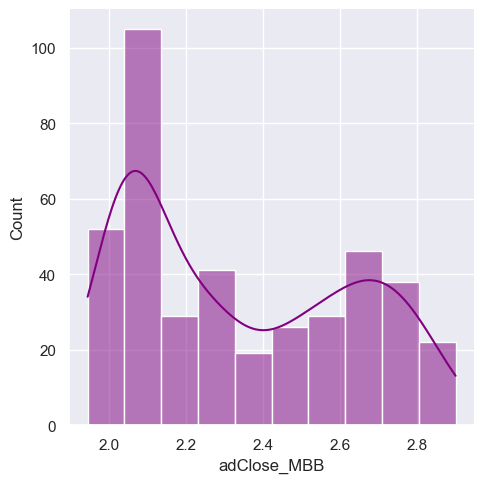

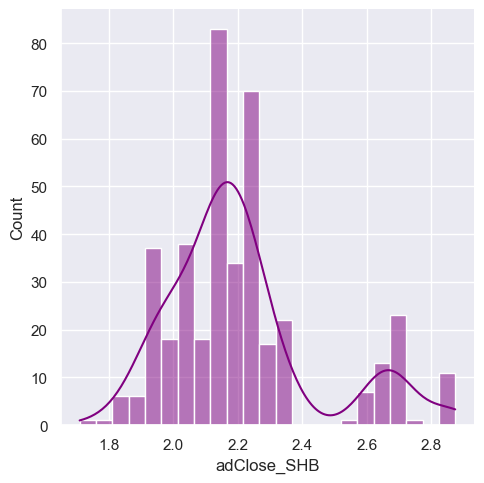

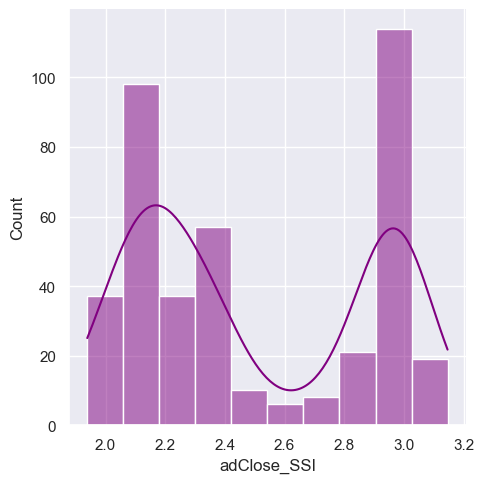

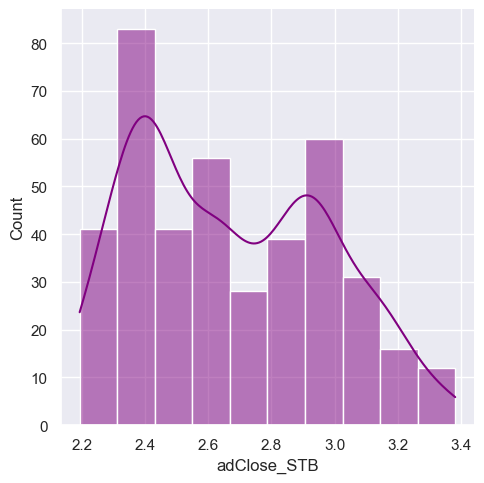

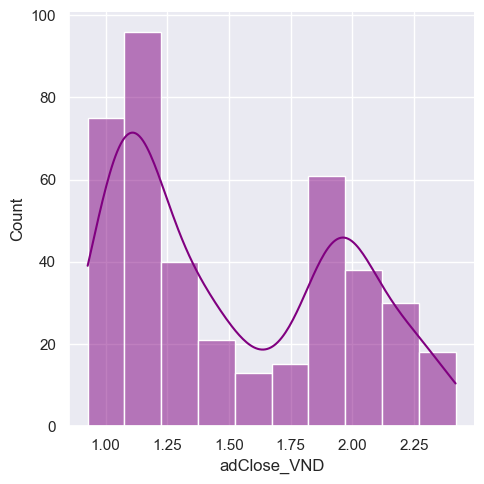

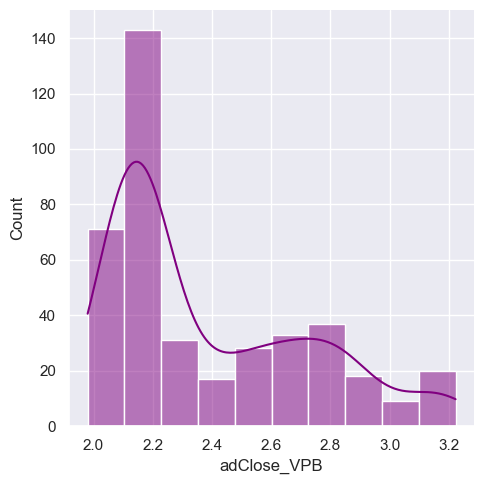

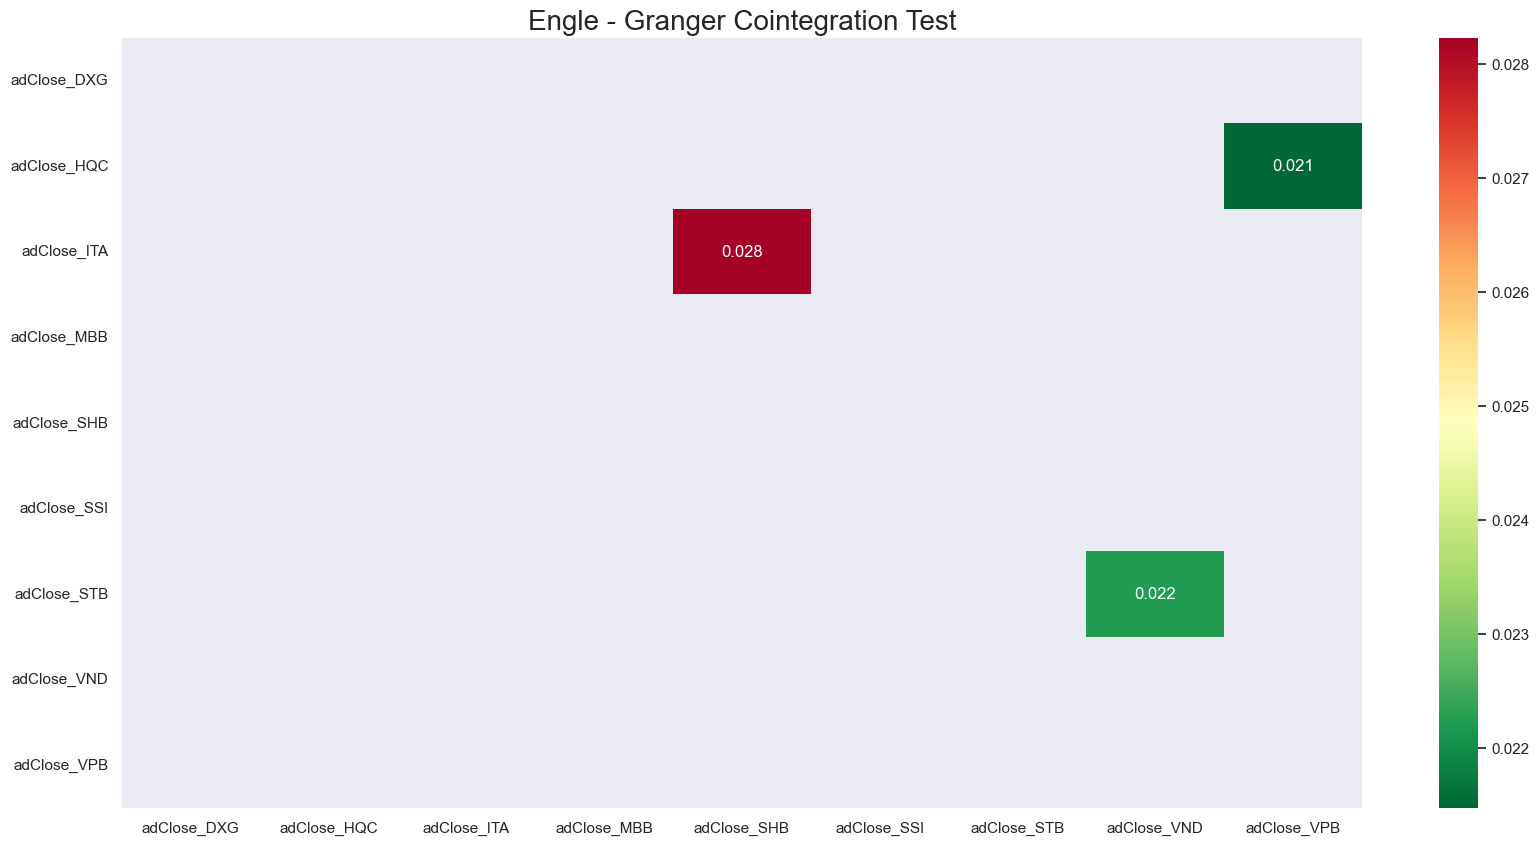

In [21]:
score_matrix, pvalue_matrix, eg_pairs = eg_coint.find_cointegrated_pairs(df_train_transformed)

In [22]:
eg_pairs 

[['adClose_HQC', 'adClose_VPB'],
 ['adClose_ITA', 'adClose_SHB'],
 ['adClose_STB', 'adClose_VND']]

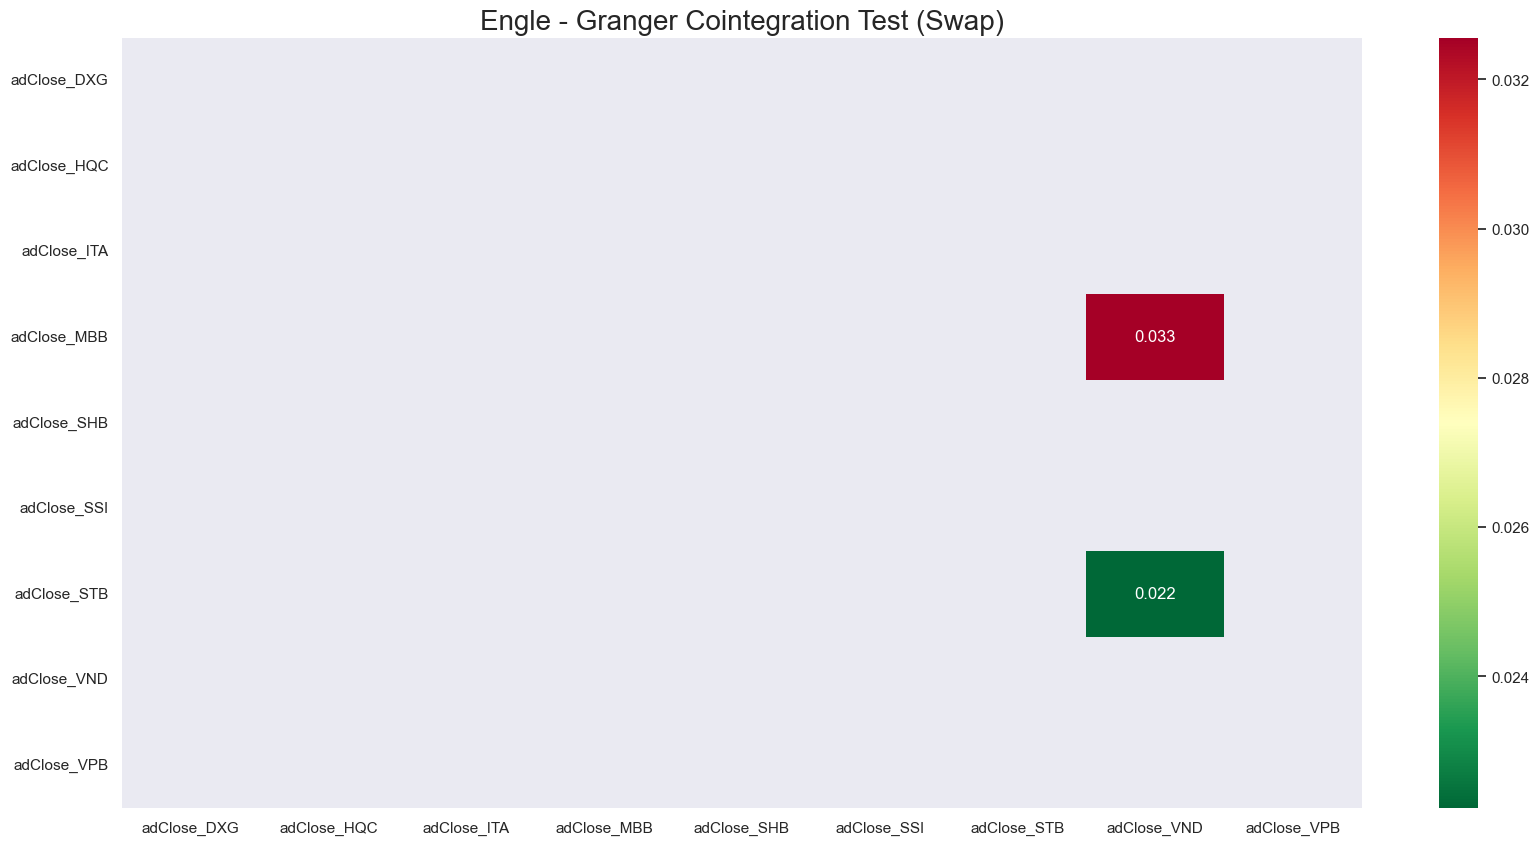

In [23]:
scores_swap, pvalues_swap, eg_pairs_swap = eg_coint.find_cointegrated_pairs_swap(df_train_transformed)

In [24]:
eg_pairs_swap

[['adClose_MBB', 'adClose_VND'], ['adClose_STB', 'adClose_VND']]

## **Johansen Method**

In [25]:
johansen_pairs = jj_coint.johansen_test(df_train_transformed)

In [26]:
johansen_pairs

[['adClose_HQC', 'adClose_ITA'],
 ['adClose_ITA', 'adClose_MBB'],
 ['adClose_ITA', 'adClose_SHB'],
 ['adClose_ITA', 'adClose_SSI'],
 ['adClose_ITA', 'adClose_VND'],
 ['adClose_ITA', 'adClose_VPB']]

# **Result Summary**

In [27]:
df_pairs_formation_train = hdf.pairs_formation_result_summary(
    gatev_pairs,
    eg_pairs,
    eg_pairs_swap,
    johansen_pairs
)

In [28]:
df_pairs_formation_train

,Stock A,Stock B,Gatev Pairs,EG Pairs,EG Pairs Swap,Johansen Pairs,Count
0,adClose_DXG,adClose_MBB,x,,,,1
1,adClose_DXG,adClose_SSI,x,,,,1
2,adClose_DXG,adClose_STB,x,,,,1
3,adClose_DXG,adClose_VPB,x,,,,1
4,adClose_HAG,adClose_MBB,x,,,,1
5,adClose_HQC,adClose_ITA,,,,x,1
6,adClose_HQC,adClose_VPB,,x,,,1
7,adClose_ITA,adClose_MBB,,,,x,1
8,adClose_ITA,adClose_SHB,,x,,x,2
9,adClose_ITA,adClose_SSI,,,,x,1


In [29]:
df_pairs_formation_train.to_csv(
    f"..//..//..//..//..//results//pairs_formation//finance//finance_pairs_formation_second_period_{hdt.today_date_to_digits()}.csv"
    )